In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [466]:
SP_STOP = set(stopwords.words('spanish'))
verde_si = '#2E8B57'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[verde_si])
sns.set_style('whitegrid')

In [467]:
df = pd.read_csv("comments.csv")

In [468]:
df.head()

,post_id,comment_id,username,comment_text,like_count,timestamp,post_caption,post_time,post_alt_text,post_comments_count,post_likes,post_media_type,post_media_url
0,17960507093778558,18267875068277350,NaN,Solicitamos una respuesta oficial sobre la ape...,0,2025-04-26T17:17:54+0000,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...
1,17960507093778558,18168088636327355,NaN,🙌🙌🙌,0,2025-04-26T14:28:03+0000,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...
2,17960507093778558,18025462469665948,NaN,"Buen día , deberían plantearse dejar de planta...",1,2025-04-26T12:53:40+0000,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...
3,17960507093778558,18058341484907080,NaN,a seguir creciendo 🙌🏻,0,2025-04-26T03:40:02+0000,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...
4,17960507093778558,18055154936233280,NaN,Skatepark en el golf ⛳️ 🙏🏻,0,2025-04-26T01:58:12+0000,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_id              4079 non-null   int64  
 1   comment_id           4079 non-null   int64  
 2   username             0 non-null      float64
 3   comment_text         4076 non-null   object 
 4   like_count           4079 non-null   int64  
 5   timestamp            4079 non-null   object 
 6   post_caption         4079 non-null   object 
 7   post_time            4079 non-null   object 
 8   post_alt_text        0 non-null      float64
 9   post_comments_count  4079 non-null   int64  
 10  post_likes           4079 non-null   int64  
 11  post_media_type      4079 non-null   object 
 12  post_media_url       4058 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 414.4+ KB


In [470]:
df.describe(include='all')

,post_id,comment_id,username,comment_text,like_count,timestamp,post_caption,post_time,post_alt_text,post_comments_count,post_likes,post_media_type,post_media_url
count,4.079000e+03,4.079000e+03,0.0,4076,4079.000000,4079,4079,4079,0.0,4079.000000,4079.000000,4079,4058
unique,NaN,NaN,NaN,3642,NaN,4071,99,99,NaN,NaN,NaN,3,97
top,NaN,NaN,NaN,👏👏👏,NaN,2025-03-21T13:44:57+0000,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,NaN,NaN,NaN,VIDEO,https://scontent.cdninstagram.com/v/t51.75761-...
freq,NaN,NaN,NaN,57,NaN,2,442,442,NaN,NaN,NaN,2000,442
mean,1.810790e+16,1.805696e+16,NaN,NaN,1.611915,NaN,NaN,NaN,NaN,123.894092,1449.878156,NaN,NaN
std,1.895405e+14,1.375256e+14,NaN,NaN,5.142851,NaN,NaN,NaN,NaN,124.241059,1610.992861,NaN,NaN
min,1.784246e+16,1.784200e+16,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,58.000000,NaN,NaN
25%,1.802644e+16,1.797139e+16,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,36.000000,413.000000,NaN,NaN
50%,1.805393e+16,1.805068e+16,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,96.000000,738.000000,NaN,NaN
75%,1.808035e+16,1.808232e+16,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,152.000000,2167.000000,NaN,NaN


In [471]:
df_filtered = df[df['username'].isna()==True]

In [472]:
df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'], errors='coerce')

# Longitudes del comentario
df_filtered['char_len']  = df_filtered['comment_text'].str.len()
df_filtered['word_len']  = df_filtered['comment_text'].str.split().str.len()

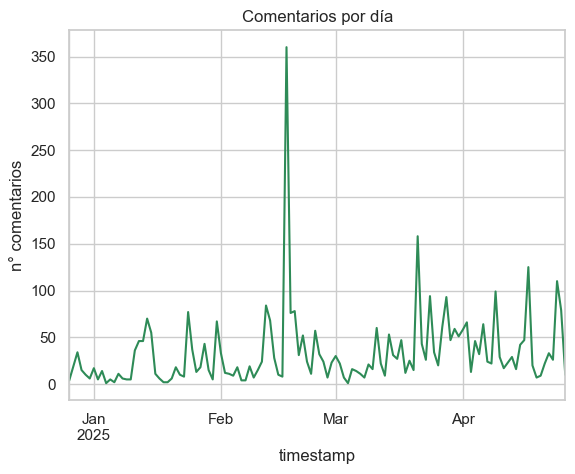

In [473]:
fig, ax = plt.subplots()
(df_filtered
 .set_index('timestamp')
 .resample('D')['comment_id']     # comentarios por día
 .count()
 .plot(ax=ax, lw=1.5))
ax.set_title('Comentarios por día')
ax.set_ylabel('n° comentarios')
plt.show()

# Luego ver por que hay un pico tan grande a mitad de febrero

In [474]:
(df_filtered
 .set_index('timestamp')
 .resample('D')['comment_id']     # comentarios por día
 .count()).reset_index().query("comment_id == 360")

,timestamp,comment_id
53,2025-02-17 00:00:00+00:00,360


In [475]:
pico_comments = df_filtered[df_filtered['timestamp'].astype(str).str.contains('2025-02-17')]

In [476]:
pico_comments.groupby('post_id').size().sort_values(ascending=False)

post_id
18493669975008278    351
18076086313709467      4
18468868831070418      3
17903965338015638      1
18046115423217444      1
dtype: int64

In [477]:
pico_comments.query("post_id == 18493669975008278")

,post_id,comment_id,username,comment_text,like_count,timestamp,post_caption,post_time,post_alt_text,post_comments_count,post_likes,post_media_type,post_media_url,char_len,word_len
2585,18493669975008278,18297480832213829,NaN,Garrido fue y es sinónimo de honestidad y voca...,0,2025-02-17 23:55:56+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,NaN,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,98.0,16.0
2586,18493669975008278,18057035621294107,NaN,Sigue en nosotros porque marco la diferencia l...,0,2025-02-17 23:52:39+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,NaN,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,326.0,61.0
2587,18493669975008278,17968899833832591,NaN,Nos seguirá cuidando siempre,1,2025-02-17 23:52:00+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,NaN,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,28.0,4.0
2588,18493669975008278,18031965758281042,NaN,"Garrido, inolvidable 💔",0,2025-02-17 23:50:28+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,NaN,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,22.0,3.0
2589,18493669975008278,18272018914270481,NaN,❤️❤️❤️❤️❤️❤️❤️,0,2025-02-17 23:50:02+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,NaN,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,18493669975008278,17843555691425298,NaN,Lo recuerdo.. saludar a todos y cuidar a la ge...,5,2025-02-17 11:33:04+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,NaN,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,62.0,12.0
2932,18493669975008278,18075485050664017,NaN,Siempre sonriente y buena energía nos cuidaba ...,17,2025-02-17 11:32:42+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,NaN,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,102.0,18.0
2933,18493669975008278,17967983024720257,NaN,"Gran ser humano! Siempre querido, siempre reco...",11,2025-02-17 11:32:27+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,NaN,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,54.0,8.0
2934,18493669975008278,17966813117843447,NaN,Honor y paz querido Aldo! Jamas olvidare sus b...,4,2025-02-17 11:32:14+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,NaN,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,79.0,13.0


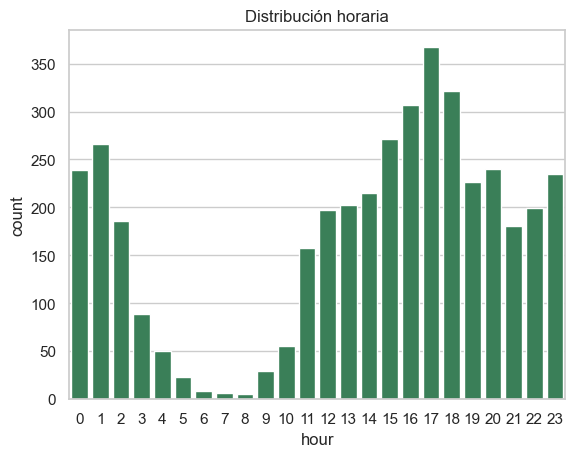

In [478]:
# Horas pico

df_filtered['hour'] = df_filtered['timestamp'].dt.hour
sns.countplot(data=df_filtered, x='hour')
plt.title('Distribución horaria')
plt.show()

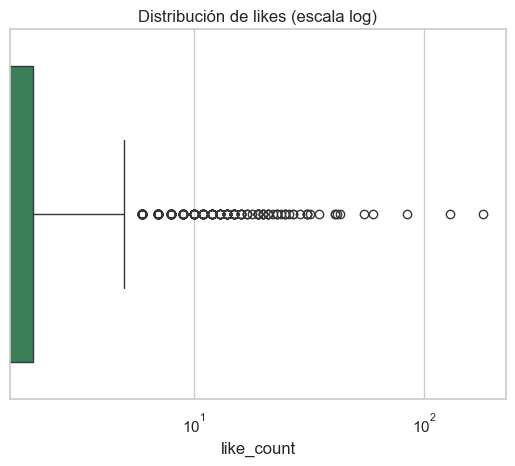

,count,mean,sum
comment_id,,,
18056649299012754,1,181.0,181
18053147234134132,1,129.0,129
18033172172263363,1,84.0,84
17938554731967564,1,60.0,60
18125791801414371,1,55.0,55


In [479]:
# Suma de likes totales en los comentarios

sns.boxplot(data=df_filtered, x='like_count')
plt.xscale('log')
plt.title('Distribución de likes (escala log)')
plt.show()

likes_post = (df_filtered.groupby('comment_id')['like_count']
                .agg(['count', 'mean', 'sum'])
                .sort_values('sum', ascending=False))
likes_post.head()

## Analisis de texto

In [480]:
nltk.download('punkt_tab')

def limpiar(texto):
    texto = texto.lower()  # quitar urls
    texto = texto.translate(str.maketrans('', '', string.punctuation+'¡¿'))
    tokens = word_tokenize(texto, language='spanish')
    tokens = [t for t in tokens if t not in SP_STOP and t.isalpha()]
    return tokens

df_filtered['tokens'] = df_filtered['comment_text'].fillna('').apply(limpiar)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [481]:
# Palabras más frecuentes
todo = Counter([tok for sub in df_filtered['tokens'] for tok in sub])
pd.DataFrame(todo.most_common(30), columns=['token', 'freq']).head(30)

eliminar = ['san', 'isidro', 'si', 'q', 'hace', 'calle', 'x']
for i in eliminar:
    del todo[i]

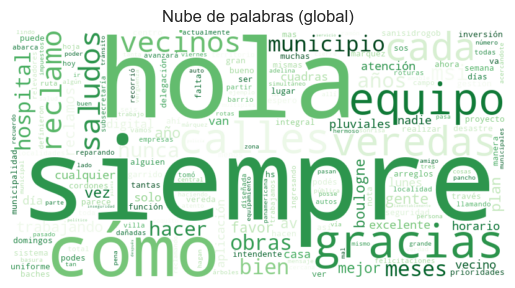

In [482]:
# WordCloud rápido
wc = WordCloud(width=800, height=400, background_color='white', colormap="Greens").generate_from_frequencies(todo)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off'); plt.title('Nube de palabras (global)'); plt.show()

In [483]:
# Bigrams frecuentes
from nltk.util import ngrams
bigrams = Counter(ngr for sub in df_filtered['tokens'] for ngr in ngrams(sub, 2))
pd.DataFrame(bigrams.most_common(20), columns=['bigram','freq']).head(20)

,bigram,freq
0,"(san, isidro)",499
1,"(equipo, msi)",138
2,"(saludos, equipo)",137
3,"(calles, veredas)",102
4,"(veredas, pluviales)",100
5,"(aplicación, san)",82
6,"(isidro, digital)",82
7,"(lunes, domingos)",72
8,"(cómo, trabajando)",51
9,"(trabajando, proyecto)",50


In [484]:
# trigrams frecuentes
trigrams = Counter(ngr for sub in df_filtered['tokens'] for ngr in ngrams(sub, 3))
pd.DataFrame(trigrams.most_common(20), columns=['trigram','freq']).head(20)

,trigram,freq
0,"(saludos, equipo, msi)",137
1,"(calles, veredas, pluviales)",100
2,"(aplicación, san, isidro)",82
3,"(san, isidro, digital)",82
4,"(cómo, trabajando, proyecto)",50
5,"(trabajando, proyecto, integral)",50
6,"(proyecto, integral, abarca)",50
7,"(integral, abarca, arreglos)",50
8,"(abarca, arreglos, calles)",50
9,"(arreglos, calles, veredas)",50


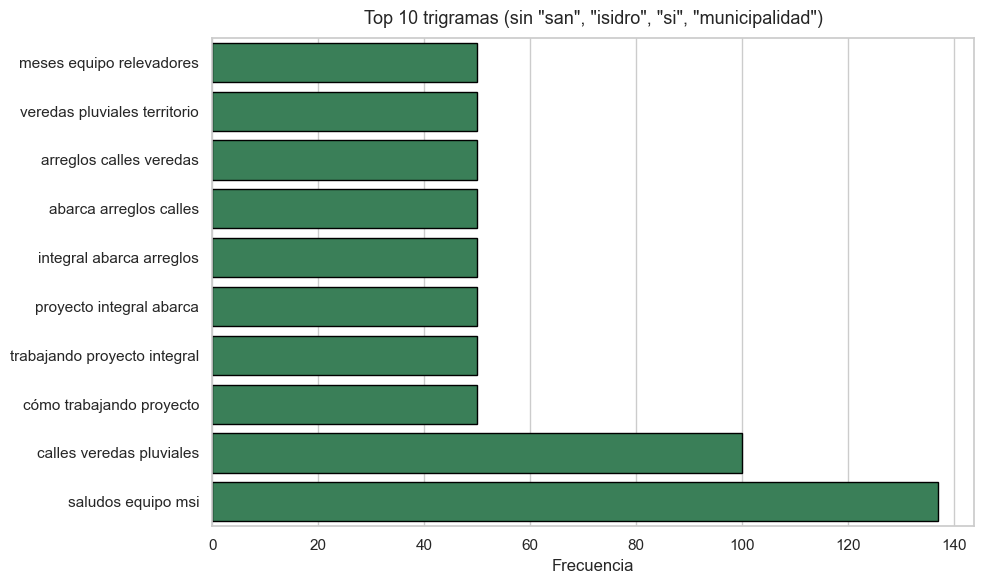

In [485]:
trigrams = Counter(
    ngr
    for toks in df_filtered['tokens']
    for ngr in ngrams(toks, 3)
)

baneadas = {'san', 'isidro', 'si', 'municipalidad'}
trigrams_filtrados = Counter(
    {
        ' '.join(tg): freq            # convierto la tupla a string
        for tg, freq in trigrams.items()
        if all(w not in baneadas for w in tg)
    }
)

TOP_N = 10
df_trig = pd.DataFrame(
    trigrams_filtrados.most_common(TOP_N),
    columns=['trigram', 'freq']
)

# Ordena de menor a mayor para que las barras queden agradables
df_trig = df_trig.iloc[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_trig,
    x='freq',
    y='trigram',
    color='#2E8B57',
    edgecolor='black'      # escala de verdes, más oscuro = más frecuencia
)

plt.title(f'Top {TOP_N} trigramas (sin "san", "isidro", "si", "municipalidad")',
          fontsize=13, pad=10)
plt.xlabel('Frecuencia')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [486]:
CLUES = [
    'arreglen', 'arreglar', 'arreglan', 'arreglo', 'arreglaron',
    'reclamo', 'reclaman', 'queja', 'problema', 'cuando', 'suciedad',
    'basura', 'mal', 'pésimo', 'pesimo', 'nunca', 'tardan', 'abandona', 'inseguridad',
    'baches', 'calles', 'falta', 'servicio', 'horrible', 'vergüenza', 'verguenza', 'denuncia', 'lamentablemente', 'lamentable'
]
regex = re.compile(r'\b(' + '|'.join(CLUES) + r')\b', flags=re.IGNORECASE)

df_filtered['possible_complaint'] = df_filtered['comment_text'].fillna('').str.contains(regex)

In [487]:
complaint_rate = df_filtered['possible_complaint'].mean()
print(f"Porcentaje de comentarios que mencionan posibles quejas: {complaint_rate:.2%}")

Porcentaje de comentarios que mencionan posibles quejas: 17.41%


## Analisis de sentimiento con VADER

In [488]:
sia = SentimentIntensityAnalyzer()
df_filtered['sentiment'] = df_filtered['comment_text'].fillna('').apply(lambda x: sia.polarity_scores(x)['compound'])

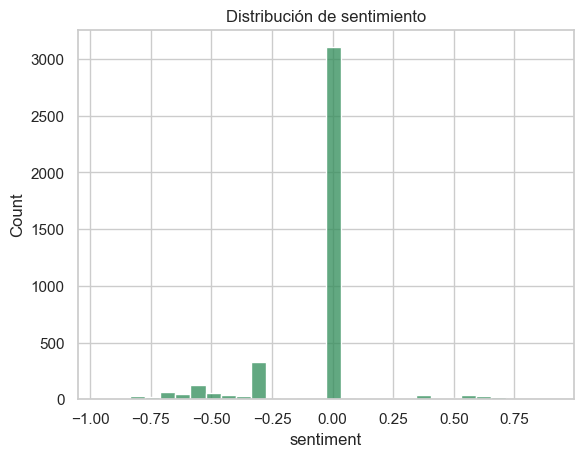

In [489]:
sns.histplot(df_filtered['sentiment'], bins=30)
plt.title('Distribución de sentimiento')
plt.show()

<Axes: >

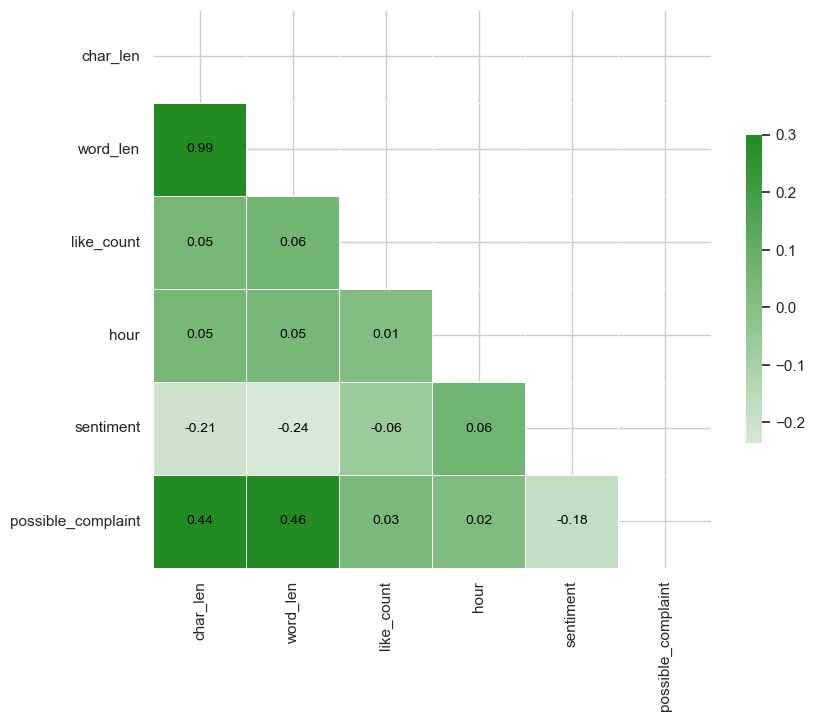

In [490]:
eda_features = df_filtered[['char_len', 'word_len', 'like_count', 'hour', 'sentiment', 'possible_complaint']]
corr = eda_features.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 8))

# Generate a custom diverging colormap
cmap = sns.light_palette("#228B22", n_colors=256, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True,
            fmt='.2f',
            annot_kws={"size":10, "color":"black"}
            )

In [491]:
# Tabla comparativa de métricas entre reclamos y no reclamos
comp = (df_filtered.groupby('possible_complaint')
          .agg(avg_likes=('like_count','mean'),
               median_len=('word_len','median'),
               avg_sent=('sentiment','mean'),
               comentarios=('comment_id','count')))
comp

,avg_likes,median_len,avg_sent,comentarios
possible_complaint,,,,
False,1.532502,8.0,-0.044878,3369
True,1.988732,32.0,-0.154182,710


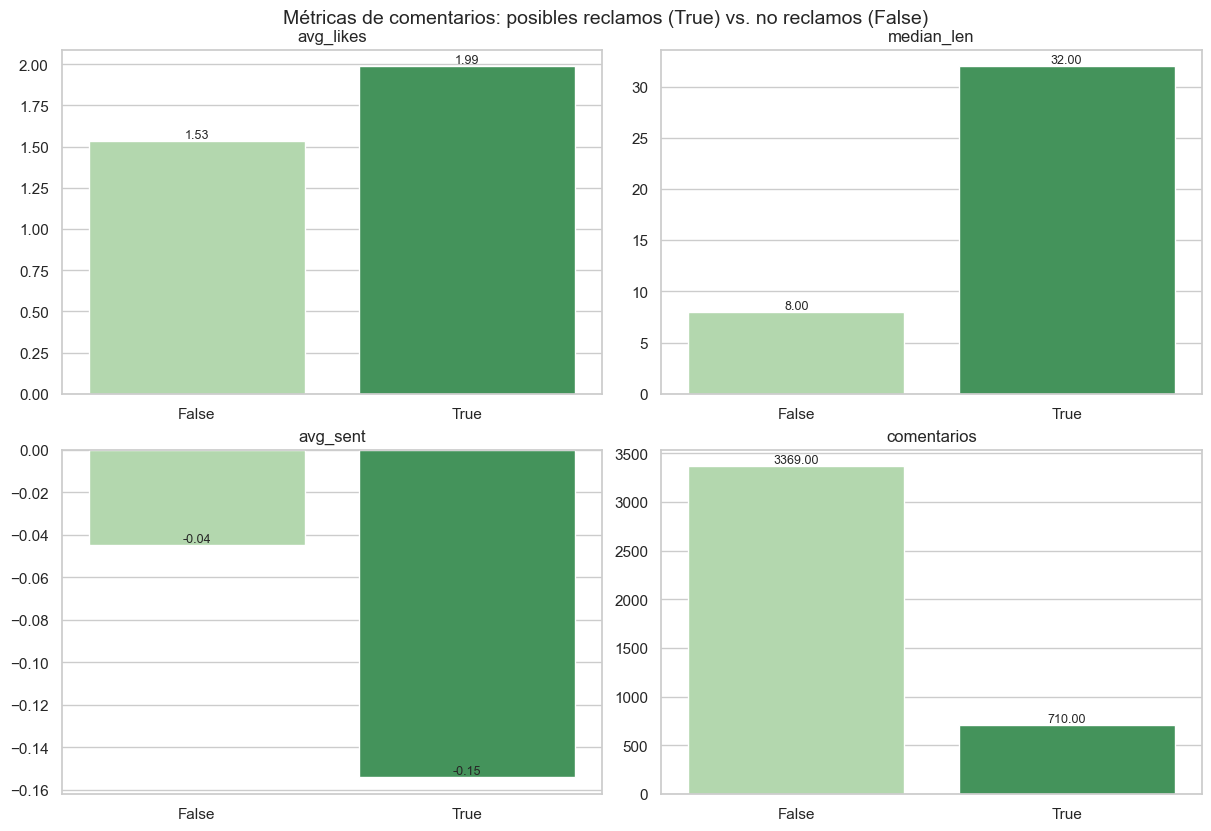

In [492]:
sns.set_theme(style="whitegrid")      # estilo opcional
metricas = comp.columns               # ['avg_likes', 'median_len', 'avg_sent', 'comentarios']

fig, axes = plt.subplots(
    nrows=2, ncols=2,                 # 2×2 = 4 subplots
    figsize=(12, 8),
    constrained_layout=True           # ajusta márgenes automáticamente
)

# Aplanamos la matriz de ejes para iterar más simple
for ax, metrica in zip(axes.flatten(), metricas):
    # ----- barras “False” vs “True” -----
    sns.barplot(
        x=comp.index.astype(str),     # convierte índice booleano a texto
        y=comp[metrica],
        palette="Greens",
        ax=ax
    )

    # Etiquetas y título
    ax.set_title(metrica, fontsize=12, pad=6)
    ax.set_xlabel("")                 # quitamos label innecesario
    ax.set_ylabel("")                 # o pon ax.set_ylabel(metrica) si lo prefieres

    # ----- valor numérico encima de cada barra -----
    for p in ax.patches:
        altura = p.get_height()
        ax.annotate(
            f"{altura:.2f}",
            (p.get_x() + p.get_width() / 2, altura),
            ha="center", va="bottom", fontsize=9
        )

plt.suptitle("Métricas de comentarios: posibles reclamos (True) vs. no reclamos (False)", fontsize=14, y=1.02)
plt.show()

In [493]:
df_filtered[df_filtered['sentiment']<0]

,post_id,comment_id,username,comment_text,like_count,timestamp,post_caption,post_time,post_alt_text,post_comments_count,post_likes,post_media_type,post_media_url,char_len,word_len,hour,tokens,possible_complaint,sentiment
7,17960507093778558,17864077797388115,NaN,11 hectáreas queres hacer un country cerrado q...,0,2025-04-25 19:21:56+00:00,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,107.0,19.0,19,"[hectáreas, queres, hacer, country, cerrado, c...",False,-0.2960
13,17960507093778558,18014011865707327,NaN,Porque no arreglan primero las cosas que está...,0,2025-04-25 15:49:22+00:00,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,326.0,58.0,15,"[arreglan, primero, cosas, rotas, caso, dos, m...",True,-0.4724
15,17960507093778558,18064217213475366,NaN,"De la suciedad en las calles , autos abandonad...",0,2025-04-25 15:34:41+00:00,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,189.0,32.0,15,"[suciedad, calles, autos, abandonados, contene...",True,-0.5574
25,18049674734346443,17946449462842966,NaN,La mejor por lejos ...lastima que no atiendan ...,0,2025-04-25 23:51:19+00:00,Hoy celebramos al clásico de todos los clásico...,2025-04-24T15:24:27+0000,NaN,152,2722,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,57.0,11.0,23,"[mejor, lejos, lastima, atiendan, noche]",False,-0.4184
31,18049674734346443,18144337000376593,NaN,Llévale panchos a la gente que no tiene que co...,0,2025-04-25 17:59:05+00:00,Hoy celebramos al clásico de todos los clásico...,2025-04-24T15:24:27+0000,NaN,152,2722,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,79.0,16.0,17,"[llévale, panchos, gente, comer, hace, bueno, ...",False,-0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,18066529195747137,18026393525532640,NaN,Mientras no hagan control de alcoholemia 😂👍🏻👍🏻,4,2024-12-28 16:57:28+00:00,Reforzamos los controles vehiculares.\nTrabaja...,2024-12-28T16:02:01+0000,NaN,57,517,CAROUSEL_ALBUM,https://scontent.cdninstagram.com/v/t51.29350-...,46.0,7.0,16,"[mientras, hagan, control, alcoholemia]",False,-0.2960
4036,18066529195747137,18290034331215203,NaN,Hacer controles en avenidas… es un show. V. Lo...,11,2024-12-28 16:27:21+00:00,Reforzamos los controles vehiculares.\nTrabaja...,2024-12-28T16:02:01+0000,NaN,57,517,CAROUSEL_ALBUM,https://scontent.cdninstagram.com/v/t51.29350-...,104.0,21.0,16,"[hacer, controles, show, v, lopez, hace, calle...",True,-0.4466
4039,18066529195747137,18072638803635934,NaN,Si quieren atrapar a muchos en infracción vaya...,3,2024-12-28 16:16:36+00:00,Reforzamos los controles vehiculares.\nTrabaja...,2024-12-28T16:02:01+0000,NaN,57,517,CAROUSEL_ALBUM,https://scontent.cdninstagram.com/v/t51.29350-...,241.0,42.0,16,"[si, quieren, atrapar, infracción, vayan, siem...",True,-0.2960
4048,18042720233014010,18042997904191080,NaN,@traversomargarita no gracias,0,2024-12-29 01:19:59+00:00,Celebramos Janucá encendiendo las velas de la ...,2024-12-27T15:34:18+0000,NaN,25,383,CAROUSEL_ALBUM,https://scontent.cdninstagram.com/v/t51.29350-...,29.0,3.0,1,"[traversomargarita, gracias]",False,-0.2960


In [494]:
df_filtered[df_filtered['comment_id']==18290034331215203]['comment_text'].to_list()

['Hacer controles en avenidas… es un show. V. Lopez lo hace en calles de barrios …. Donde NO SE LO ESPERAN']

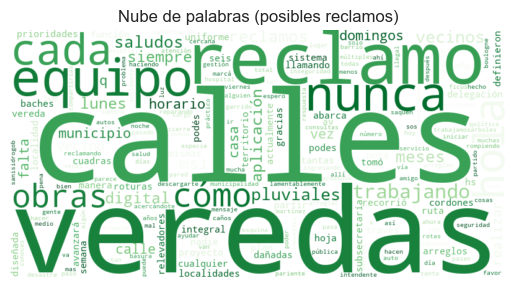

In [495]:
todo_quejas = Counter([tok for sub in df_filtered[df_filtered['possible_complaint']]['tokens'] for tok in sub])
borrar_elementos = ['si', 'hace', 'san', 'isidro']
for i in borrar_elementos:
    del todo_quejas[i]
pd.DataFrame(todo_quejas.most_common(30), columns=['token', 'freq']).head(30)

wc_quejas = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(todo_quejas)
plt.imshow(wc_quejas, interpolation='bilinear')
plt.axis('off'); plt.title('Nube de palabras (posibles reclamos)'); plt.show()

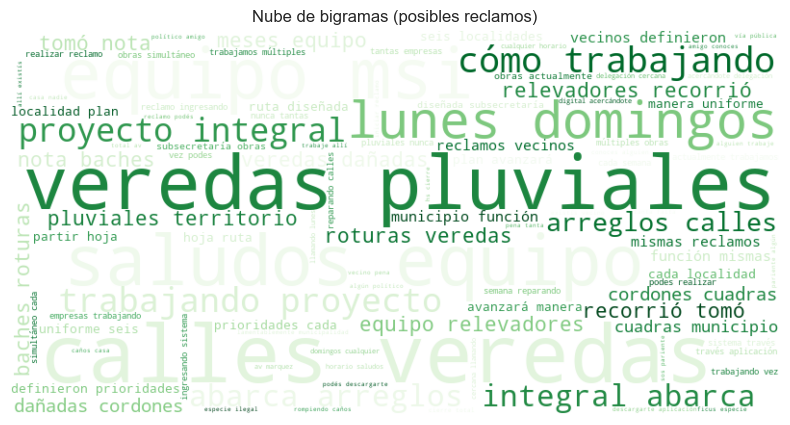

In [496]:
from itertools import tee

def bigramas(tokens):
    """Devuelve bigramas como strings 'palabra1 palabra2'."""
    a, b = tee(tokens)
    next(b, None)                 # desplaza el segundo iterador
    return [' '.join(bg) for bg in zip(a, b)]

bigr_counter = Counter(
    bg
    for toks in df_filtered.loc[df_filtered['possible_complaint'], 'tokens']
    for bg in bigramas(toks)
)

borrar_set = set(['si', 'hace', 'san', 'isidro'])   # o reutiliza tu lista
for bg in list(bigr_counter):                       # list() para iterar copia
    if any(w in borrar_set for w in bg.split()):
        del bigr_counter[bg]

TOP_N = 100
bigr_counter = Counter(dict(bigr_counter.most_common(TOP_N)))

wc_bigr = WordCloud(width=800,
                    height=400,
                    background_color='white',
                    colormap='Greens',
                    collocations=False).generate_from_frequencies(bigr_counter)

plt.figure(figsize=(10, 5))
plt.imshow(wc_bigr, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de bigramas (posibles reclamos)')
plt.show()

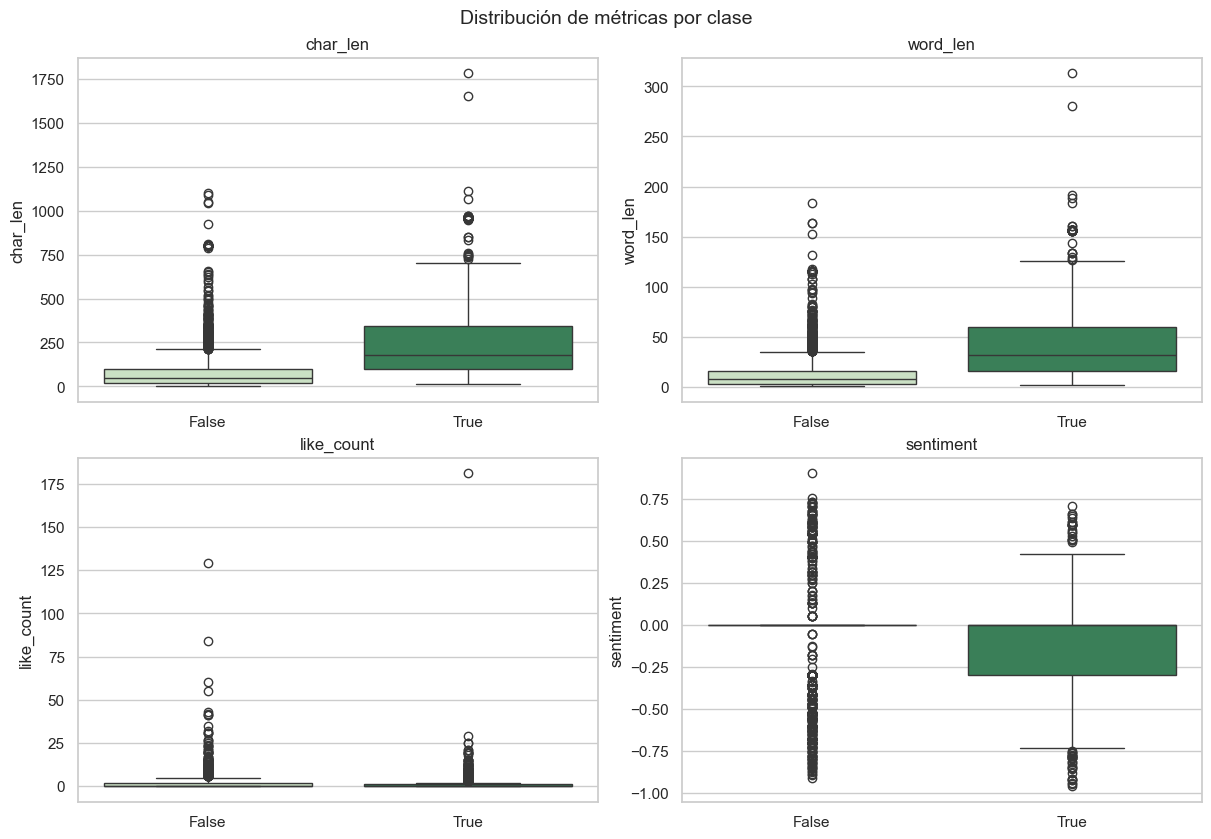

In [497]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
num_cols = ['char_len', 'word_len', 'like_count', 'sentiment']

for ax, col in zip(axs.flatten(), num_cols):
    sns.boxplot(data=df_filtered, y=col, x='possible_complaint',
                palette=['#C7E4C0', '#2E8B57'], ax=ax)
    ax.set_xlabel('')          # limpia etiqueta
    ax.set_title(col)

plt.suptitle('Distribución de métricas por clase', y=1.03, fontsize=14)
plt.show()

In [498]:
df_filtered.query('possible_complaint == True & sentiment > 0').head()

,post_id,comment_id,username,comment_text,like_count,timestamp,post_caption,post_time,post_alt_text,post_comments_count,post_likes,post_media_type,post_media_url,char_len,word_len,hour,tokens,possible_complaint,sentiment
126,18049674734346443,17953316996796694,NaN,Gracias pancho por alimentarme esos días en el...,0,2025-04-24 17:12:23+00:00,Hoy celebramos al clásico de todos los clásico...,2025-04-24T15:24:27+0000,NaN,152,2722,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,132.0,22.0,17,"[gracias, pancho, alimentarme, días, ahorrando...",True,0.5622
268,18026444198457339,18369278818130731,NaN,GENTE ESTO ES INCREÍBLE.... POR FAVOR NO OLVID...,1,2025-04-17 18:36:56+00:00,Estamos renovando los natatorios en los Campos...,2025-04-17T15:41:06+0000,NaN,50,430,VIDEO,https://instagram.faep8-2.fna.fbcdn.net/o1/v/t...,386.0,62.0,18,"[gente, increíble, favor, olvidar, próximas, v...",True,0.3956
390,18098229253530340,18342246742082444,NaN,Por favor arreglar la mitad de la calle Urugua...,0,2025-04-22 00:53:54+00:00,Así es el proceso de repavimentación que estam...,2025-04-16T15:10:48+0000,NaN,15,160,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,111.0,22.0,0,"[favor, arreglar, mitad, calle, uruguay, perte...",True,0.4019
433,17966991146892597,18021369635499826,NaN,"Imposible transitar por la calle Urquiza, en A...",2,2025-04-16 01:06:00+00:00,¡Es hoy martes! ¿Te lo vas a perder?\nTe esper...,2025-04-15T14:46:02+0000,NaN,69,402,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,126.0,20.0,1,"[imposible, transitar, calle, urquiza, acassus...",True,0.4019
438,17966991146892597,17866034529363209,NaN,Pónganse las pilas en arreglar los tremendos p...,3,2025-04-15 23:52:16+00:00,¡Es hoy martes! ¿Te lo vas a perder?\nTe esper...,2025-04-15T14:46:02+0000,NaN,69,402,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,228.0,37.0,23,"[pónganse, pilas, arreglar, tremendos, pozos, ...",True,0.6371


In [499]:
df_filtered.query("comment_id == 17945917703809423")['comment_text'].to_list()

['Hola!! Venimos reclamando desde que esta el Parque Publico del Gold,plan de manejo,baños ,seguridad ,iluminacion.\nQue se respete y se cuide porque es Paisaje Protegido.\nHicimos notas reuniones hasta noviembre 2024 ,d4onde se voto a favor en una Sesion del HCD ,se aprobo nuestro reclamo...( Asamblea de vecinos del Golf de V.Adelina)']

In [500]:
# 1) Conteo por (hora, posible_complaint)
counts = df_filtered.groupby(['hour', 'possible_complaint']).size()

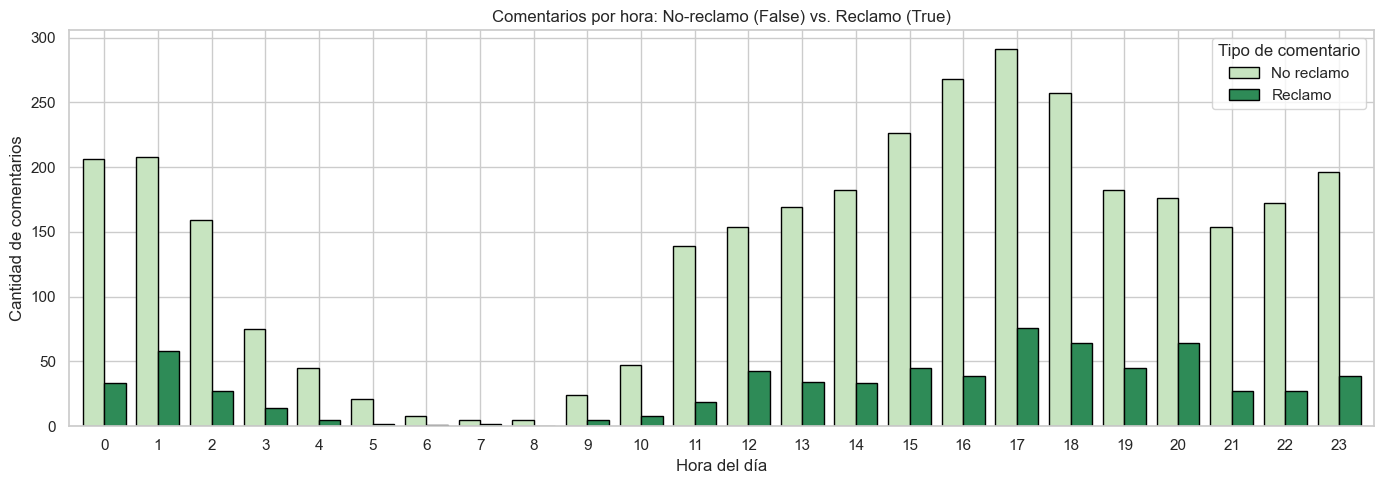

In [501]:

counts_df = counts.unstack(level='possible_complaint', fill_value=0)

# 3) Plot en barras agrupadas
ax = counts_df.plot(
    kind='bar',
    figsize=(14, 5),
    width=0.8,
    color=['#C7E4C0', '#2E8B57'],   # primero False, luego True
    edgecolor='black'
)

# 4) Detalles de estilo
ax.set_xlabel('Hora del día')
ax.set_ylabel('Cantidad de comentarios')
ax.set_title('Comentarios por hora: No-reclamo (False) vs. Reclamo (True)')
ax.legend(['No reclamo', 'Reclamo'], title='Tipo de comentario')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [502]:
from collections import Counter
from nltk.util import ngrams

# unigrams
freq_true  = Counter(t for sub in df_filtered[df_filtered.possible_complaint].tokens for t in sub)
freq_false = Counter(t for sub in df_filtered[~df_filtered.possible_complaint].tokens for t in sub)

# razón de prevalencias (log-odds simplificado)
import pandas as pd, numpy as np
vocab = set(freq_true) | set(freq_false)
df_tok = pd.DataFrame({
    'token': list(vocab),
    'true':  [freq_true[t]  for t in vocab],
    'false': [freq_false[t] for t in vocab]
})
df_tok['log_odds'] = np.log((df_tok['true']+0.5)/(df_tok['false']+0.5))
df_tok.sort_values('log_odds', ascending=False).head(20)


,token,true,false,log_odds
4864,calles,199,0,5.988961
2442,reclamo,173,0,5.849325
7647,nunca,130,0,5.564520
4785,aplicación,82,0,5.105945
1404,digital,82,0,5.105945
4021,falta,73,0,4.990433
5093,baches,63,0,4.844187
7191,seis,51,0,4.634729
2428,partir,51,0,4.634729
7889,roturas,51,0,4.634729


In [503]:
df_filtered

,post_id,comment_id,username,comment_text,like_count,timestamp,post_caption,post_time,post_alt_text,post_comments_count,post_likes,post_media_type,post_media_url,char_len,word_len,hour,tokens,possible_complaint,sentiment
0,17960507093778558,18267875068277350,NaN,Solicitamos una respuesta oficial sobre la ape...,0,2025-04-26 17:17:54+00:00,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,92.0,15.0,17,"[solicitamos, respuesta, oficial, apertura, ca...",False,0.0000
1,17960507093778558,18168088636327355,NaN,🙌🙌🙌,0,2025-04-26 14:28:03+00:00,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,3.0,1.0,14,[],False,0.0000
2,17960507093778558,18025462469665948,NaN,"Buen día , deberían plantearse dejar de planta...",1,2025-04-26 12:53:40+00:00,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,154.0,25.0,12,"[buen, día, deberían, plantearse, dejar, plant...",False,0.0000
3,17960507093778558,18058341484907080,NaN,a seguir creciendo 🙌🏻,0,2025-04-26 03:40:02+00:00,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,21.0,4.0,3,"[seguir, creciendo]",False,0.0000
4,17960507093778558,18055154936233280,NaN,Skatepark en el golf ⛳️ 🙏🏻,0,2025-04-26 01:58:12+00:00,Así construimos dos nuevas canchas en el Campo...,2025-04-25T14:51:20+0000,NaN,21,234,VIDEO,https://instagram.faep8-1.fna.fbcdn.net/o1/v/t...,26.0,6.0,1,"[skatepark, golf]",False,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,18037154117346020,17958397334850377,NaN,🙌,0,2024-12-27 09:34:24+00:00,Compartimos la 17° edición del Plenario de Nut...,2024-12-26T14:46:24+0000,NaN,11,237,VIDEO,https://instagram.faep8-2.fna.fbcdn.net/o1/v/t...,1.0,1.0,9,[],False,0.0000
4075,18037154117346020,17860451469321391,NaN,Brindo con ustedes queridas Nutris de mi amado...,0,2024-12-26 17:31:17+00:00,Compartimos la 17° edición del Plenario de Nut...,2024-12-26T14:46:24+0000,NaN,11,237,VIDEO,https://instagram.faep8-2.fna.fbcdn.net/o1/v/t...,124.0,22.0,17,"[brindo, ustedes, queridas, nutris, amado, san...",False,0.3612
4076,18037154117346020,18039003203351132,NaN,Estaría bueno que volviera creciendo sano para...,0,2024-12-26 17:31:09+00:00,Compartimos la 17° edición del Plenario de Nut...,2024-12-26T14:46:24+0000,NaN,11,237,VIDEO,https://instagram.faep8-2.fna.fbcdn.net/o1/v/t...,57.0,9.0,17,"[bueno, volviera, creciendo, sano, chicos]",False,0.0000
4077,18037154117346020,18296974228230545,NaN,👏❤️,2,2024-12-26 14:50:43+00:00,Compartimos la 17° edición del Plenario de Nut...,2024-12-26T14:46:24+0000,NaN,11,237,VIDEO,https://instagram.faep8-2.fna.fbcdn.net/o1/v/t...,3.0,1.0,14,[],False,0.0000


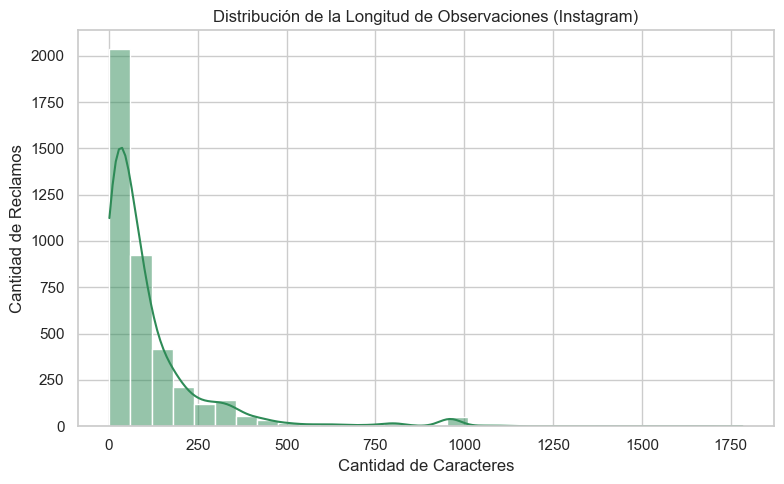

In [504]:
# 🧮 Calcular longitud de cada observación
df_filtered['longitud'] = df_filtered['comment_text'].str.len()

# 📊 Distribución de la longitud de observaciones
plt.figure(figsize=(8,5))
sns.histplot(df_filtered['longitud'], bins=30, color=verde_si, kde=True)
plt.title('Distribución de la Longitud de Observaciones (Instagram)')
plt.xlabel('Cantidad de Caracteres')
plt.ylabel('Cantidad de Reclamos')
plt.tight_layout()
plt.show()


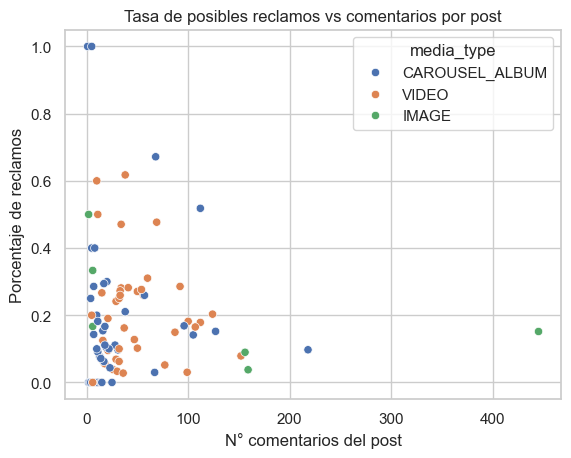

In [505]:
# %%% Agrupar y calcular tasa de reclamos por post %%%
post_stats = (
    df_filtered
    .groupby('post_id')
    .agg(
        comp_rate        = ('possible_complaint', 'mean'),
        post_likes       = ('post_likes', 'first'),
        post_comments    = ('post_comments_count', 'first'),
        caption_len_chars= ('post_caption', lambda x: x.str.len().iloc[0]),
        media_type       = ('post_media_type', 'first')
    )
    .reset_index()
)

# Scatter: comp_rate vs post_comments
import seaborn as sns
sns.scatterplot(data=post_stats, x='post_comments', y='comp_rate', hue='media_type')
plt.title('Tasa de posibles reclamos vs comentarios por post')
plt.xlabel('N° comentarios del post')
plt.ylabel('Porcentaje de reclamos')
plt.show()


In [513]:
df_filtered['dow'] = df_filtered['timestamp'].dt.day_name()  

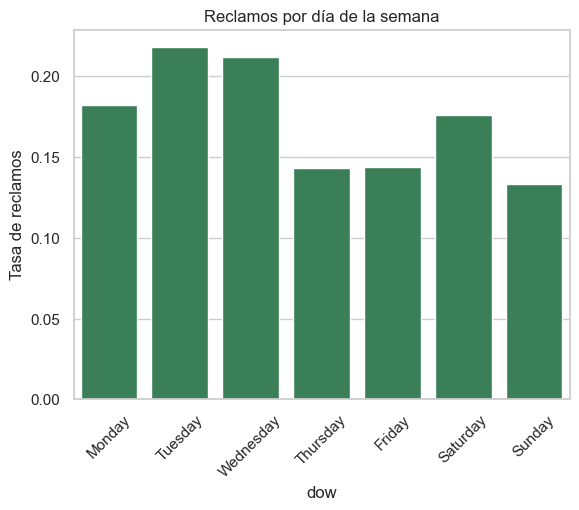

In [515]:
  # Lunes, Martes, …
agg_dow = df_filtered.groupby('dow')['possible_complaint'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

sns.barplot(x=agg_dow.index, y=agg_dow.values, color=verde_si)
plt.xticks(rotation=45)
plt.ylabel('Tasa de reclamos')
plt.title('Reclamos por día de la semana')
plt.show()


In [517]:
# Emoji count (básico)
df_filtered['emoji_count'] = df_filtered['comment_text'].str.count(r'[\U0001F600-\U0001F64F]')

# Puntuación
df_filtered['exclams'] = df_filtered['comment_text'].str.count('!')
df_filtered['quests']  = df_filtered['comment_text'].str.count(r'\?')

# Diversidad léxica
df_filtered['lex_div'] = df_filtered['tokens'].apply(lambda toks: len(set(toks))/max(len(toks),1))

# Comparar medias entre reclamos y no reclamos
feat = ['char_len','word_len','sentiment','emoji_count','exclams','quests','lex_div']
df_filtered.groupby('possible_complaint')[feat].mean().T


possible_complaint,False,True
char_len,79.579917,269.029577
word_len,13.426916,46.216901
sentiment,-0.044878,-0.154182
emoji_count,0.248366,0.107042
exclams,0.649733,0.746479
quests,0.234403,0.456338
lex_div,0.817162,0.957642


In [518]:


def top_ngrams(df_sub, n=20, k=1):
    cnt = Counter()
    for toks in df_sub['tokens']:
        if k==1:
            cnt.update(toks)
        else:
            cnt.update(ngrams(toks, k))
    return cnt.most_common(n)

# Unigrams
top_pos    = top_ngrams(df_filtered[df_filtered['possible_complaint']==False], n=20, k=1)
top_recl   = top_ngrams(df_filtered[df_filtered['possible_complaint']==True ], n=20, k=1)

# Bigramas
top2_pos   = top_ngrams(df_filtered[df_filtered['possible_complaint']==False], n=10, k=2)
top2_recl  = top_ngrams(df_filtered[df_filtered['possible_complaint']==True ], n=10, k=2)

print("Unigrams no-reclamos:", top_pos)
print("Unigrams reclamos:",   top_recl)


Unigrams no-reclamos: [('san', 237), ('siempre', 235), ('isidro', 216), ('gracias', 173), ('si', 171), ('hola', 158), ('q', 146), ('cómo', 128), ('bien', 121), ('hospital', 105), ('mejor', 100), ('años', 95), ('hace', 91), ('boulogne', 86), ('saludos', 86), ('vecinos', 82), ('calle', 81), ('excelente', 80), ('gente', 79), ('hacer', 78)]
Unigrams reclamos: [('san', 303), ('isidro', 287), ('calles', 199), ('veredas', 175), ('reclamo', 173), ('equipo', 144), ('nunca', 130), ('si', 129), ('hace', 128), ('cada', 128), ('hola', 127), ('cómo', 119), ('obras', 112), ('trabajando', 106), ('pluviales', 101), ('vecinos', 98), ('saludos', 92), ('reclamos', 91), ('meses', 90), ('msi', 89)]


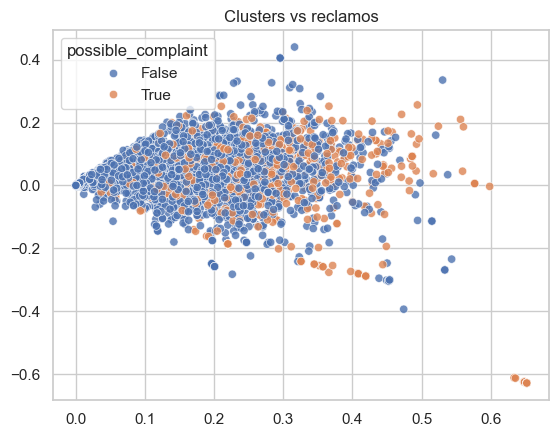

In [526]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

tfidf = TfidfVectorizer(max_features=2000)
X      = tfidf.fit_transform(df_filtered['comment_text'].fillna(''))

# Reducir dimensión
svd = TruncatedSVD(n_components=2)
X2  = svd.fit_transform(X)

# KMeans
km = KMeans(n_clusters=4, random_state=0).fit(X2)
df_filtered['cluster'] = km.labels_

sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=df_filtered['possible_complaint'], alpha=0.8)
plt.title('Clusters vs reclamos')
plt.show()
